In [ ]:
  # Importar bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report #esta linha é particularmente importante neste notebook!!!

import warnings
warnings.filterwarnings("ignore")

## Exercício 1. Case: Cantões suíços
Aqui, a ideia é fazer um modelo de regressão linear para analisar a relação entre a Taxa de natalidade e variáveis socioeconômicas sobre os cantões suíços no século 19.

- Natalidade: Taxa de natalidade por 1.000 habitantes.

- Agricultura: Porcentagem da população envolvida na agricultura.

- Examination (Exame): Porcentagem da população no serviço militar.

- Educação: Porcentagem da população com educação além do nível primário.

- Religião: Alta/baixa, em relação à porcentagem de habitantes católicos.

- Mortalidade Infantil: Taxa de mortalidade infantil (por mil nascidos vivos).

In [ ]:
# Seu código
df=pd.read_excel("http://www.orlandoalbarracin.com.br/phyton/Data_Swit.xlsx")
df.head()

,id,Distrito,Natalidade,Agricultura,Militar,Educação,Religião,Mortalidade_Infantil
0,1,Courtelary,80.2,17.0,15.0,12,baixa,22.2
1,2,Delemont,83.1,45.1,6.0,9,alta,22.2
2,3,Franches-Mnt,92.5,39.7,5.0,5,alta,20.2
3,4,Moutier,85.8,36.5,12.0,7,baixa,20.3
4,5,Neuveville,76.9,43.5,17.0,15,baixa,20.6


### Questão 1. Explorar os dados, verificar se há valores nulos.

In [ ]:
# Seu código
df.isnull().sum()

id                      0
Distrito                0
Natalidade              0
Agricultura             1
Militar                 1
Educação                0
Religião                1
Mortalidade_Infantil    1
dtype: int64

In [ ]:
df=df.dropna()
df.isnull().sum()

id                      0
Distrito                0
Natalidade              0
Agricultura             0
Militar                 0
Educação                0
Religião                0
Mortalidade_Infantil    0
dtype: int64

### Questão 2. Fazer um gráfico de dispersão para visualizar a possível relação linear entre as variáveis: fertilidade e Militar / fertilidade e Agricultura / fertilidade e Educação.

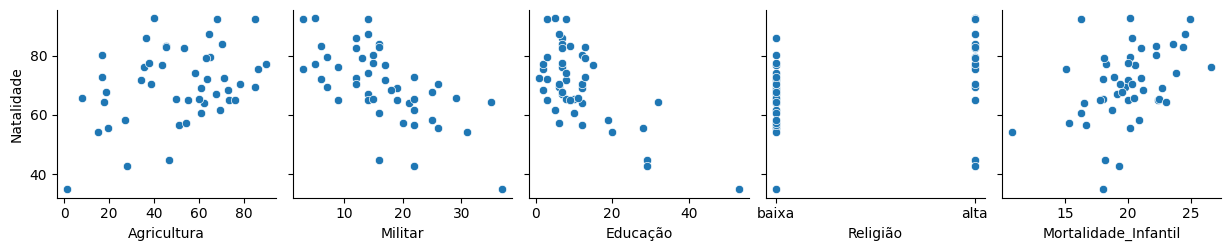

In [ ]:
# Seu código

sns.pairplot(df,
             x_vars=['Agricultura', 'Militar', 'Educação','Religião','Mortalidade_Infantil'],
             y_vars='Natalidade',
             kind='scatter')
plt.show()

### Questão 3. Ajustar um modelo de regressão linear para prever a taxa de natalidade (`Natalidade`) usando como variáveis explicativas: `Agricultura`, `Militar`, `Educação` e `Mortalidade_Infantil`.

- Qual é o valor do R ao quadrado?
- Qual variável não é significativa ao nível de significância de 0.05.

In [ ]:
# Seu código

model = sm.ols(formula='Natalidade ~Agricultura+ Militar + Educação +Mortalidade_Infantil',
               data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Natalidade   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     19.02
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           5.41e-09
Time:                        23:31:06   Log-Likelihood:                -160.57
No. Observations:                  47   AIC:                             331.1
Df Residuals:                      42   BIC:                             340.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               68.7731 

## Exercício 2 Case: Wine Segmentation

O objetivo aqui é usar um modelo de **k-vizinhos** próximos para classificar o tipo de vinho `(Type)` considerando como variáveis explicativas **todas** as características químicas apresentadas na base de dados.

**Observação:** `Use 70% dos dados` para treinar o modelo. No código `train_test_split`, use `random_state = 1984` e considere `stratify=y`

Lembre-se de verificar a qualidade dos dados (valores ausentes por exemplo), a necessidade de normalizações e encodes, remoção de atributos etc. justificando, nos casos que julgar necessário, as tranformações que você optar por fazer.


In [ ]:
df=pd.read_excel("http://www.orlandoalbarracin.com.br/phyton/wine.xlsx")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Type
0,14.83,1.64,LOW,14.0,97,2.80,2.98,0.29,1.98,5.20,type A
1,14.75,1.73,HIGH,11.4,91,3.10,3.69,0.43,2.81,5.40,type A
2,14.39,1.87,HIGH,14.6,96,2.50,2.52,0.30,1.98,5.25,type A
3,14.38,3.59,LOW,16.0,102,3.25,3.17,0.27,2.19,4.90,type A
4,14.38,1.87,HIGH,12.0,102,3.30,3.64,0.29,2.96,7.50,type A


In [ ]:
df.Type.unique()

array(['type A', 'type C', 'type B'], dtype=object)

### Questão 1. Use um modelo k-vizinhos considerando k =3 e 4. Qual apresentou maior porcentagem de acertos?

In [ ]:
# Dados de entrada/saída
X = df[['Alcohol', 'Malic_Acid', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity']]
y = df[["Type"]]

#Criando dummies
dummies = pd.get_dummies(df["Ash"])

# Normalizando os dados
X_padronizados = (X-X.mean())/X.std()
X_padronizados = pd.concat([X_padronizados, dummies],axis=1) #adicionando dummies

# Treinamento/teste
X_train, X_test, y_train, y_test = train_test_split(X_padronizados,y,test_size=0.3, random_state = 1984,stratify=y)

# Definindo ou declarando o modelo
k=3
clf = neighbors.KNeighborsClassifier(k)


# Aprendizado (Emprega o conjunto de treinamento)
clf.fit(X_train, y_train)

# Testando o modelo
y_pred = clf.predict(X_test)

# Avaliando o modelo
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 3,  5,  0],
       [ 5, 10,  5],
       [ 3,  3, 20]])

In [ ]:
# Avaliando a acuracia do modelo

verdadeiro = cnf_matrix[0][0]+cnf_matrix[1][1]+cnf_matrix[2][2]

falso = sum(cnf_matrix).sum()-verdadeiro

acertos = verdadeiro
erros = falso

print('Erros   : ', erros)
print('Acertos : ',acertos)
print('--------')
print('Porcentagem de acertos : ', acertos/(sum(cnf_matrix).sum())*100, "%")

Erros   :  22
Acertos :  32
--------
Porcentagem de acertos :  59.25925925925925 %


In [ ]:
#3: 61,11 %
#4: 59,29 %

### Questão 2.  Considerando o modelo k-vizinho com maior % de acertos, calcule o F1- score

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

      type A       0.27      0.38      0.32         8
      type B       0.56      0.50      0.53        20
      type C       0.80      0.77      0.78        26

    accuracy                           0.61        54
   macro avg       0.54      0.55      0.54        54
weighted avg       0.63      0.61      0.62        54



### Questão 3. Considerando o modelo k-vizinho com maior % de acertos, classifique um vinho com as seguintes características:

In [ ]:
df=pd.read_excel("http://www.orlandoalbarracin.com.br/phyton/wine.xlsx")

dado_novo=pd.DataFrame([[12.83,	1.14, "LOW",11.0,	94,	3.80,	1.98,	0.29,	1.98,	7.20]], columns=df.drop("Type", axis=1).columns)
dado_novo

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity
0,12.83,1.14,LOW,11.0,94,3.8,1.98,0.29,1.98,7.2


In [ ]:
dado_novo["LOW"]=1
dado_novo["HIGH"]=0

In [ ]:
# Fazendo a predição
X_new_case=dado_novo[['Alcohol', 'Malic_Acid', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity']]
X_new_case_padr=(X_new_case-X.mean())/X.std()

X_new_case_padr=pd.concat([X_new_case_padr, dado_novo[["HIGH","LOW"]]],axis=1)

Loan_type_pred = clf.predict(X_new_case_padr)

print('Classificação Knn, k=', k ,' para o novo empréstimo ', 'é ')
print(Loan_type_pred)

Classificação Knn, k= 3  para o novo empréstimo  é 
['type B']
